# Advanced Coding Group Project - 2024/25 
#### Students: Michele Turco, Mattia Cervelli, Lorenzo Laterza 

## 0) Import Libraries and the Dataset

Setup your python environment and download the credit-score data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
credit_card_df = pd.read_csv('train_biased.csv')

## 1) Understanding the dataset



#### 1.1) General overview of the dataset

Using the function .head(), we can extract from the dataset the first x rows (x=5 by default, but we can change this number). They are not useful for analytic purposes, but still enable us to visualize the dataset.

In [ ]:
credit_card_df.head

#### 1.2) Showing the dataset shape

In [15]:
# Identify Number of Columns and Rows
n_rows = len(credit_card_df)
n_columns = len(credit_card_df.columns)
print(f"The dataset contains {n_columns} columns")
print(f"The dataset contains {n_rows} rows")

The dataset contains 27 columns
The dataset contains 100000 rows


#### 1.3) Gathering information from data



In [ ]:
credit_card_df.info()

In [ ]:
credit_card_df.nunique()

#### 1.4) Missing values

In [ ]:
missing_values = credit_card_df.isnull().sum()
missing_values

#### 1.5) Data Types Check

In [ ]:
##Selecting numerical features
numerical_data = credit_card_df.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

#Selecting categoricalfeatures
categorical_data = credit_card_df.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features = categorical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)
print('\n')
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

In [ ]:
credit_card_df.describe().T

In [ ]:
credit_card_df.describe(include="object").T

#### 1.6) Distribution of numerical variables

In [ ]:
# Loop through all numerical columns and plot their distributions : it does not work yet!!!!!
numeric_cols = credit_card_df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, len(numeric_cols) * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(credit_card_df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

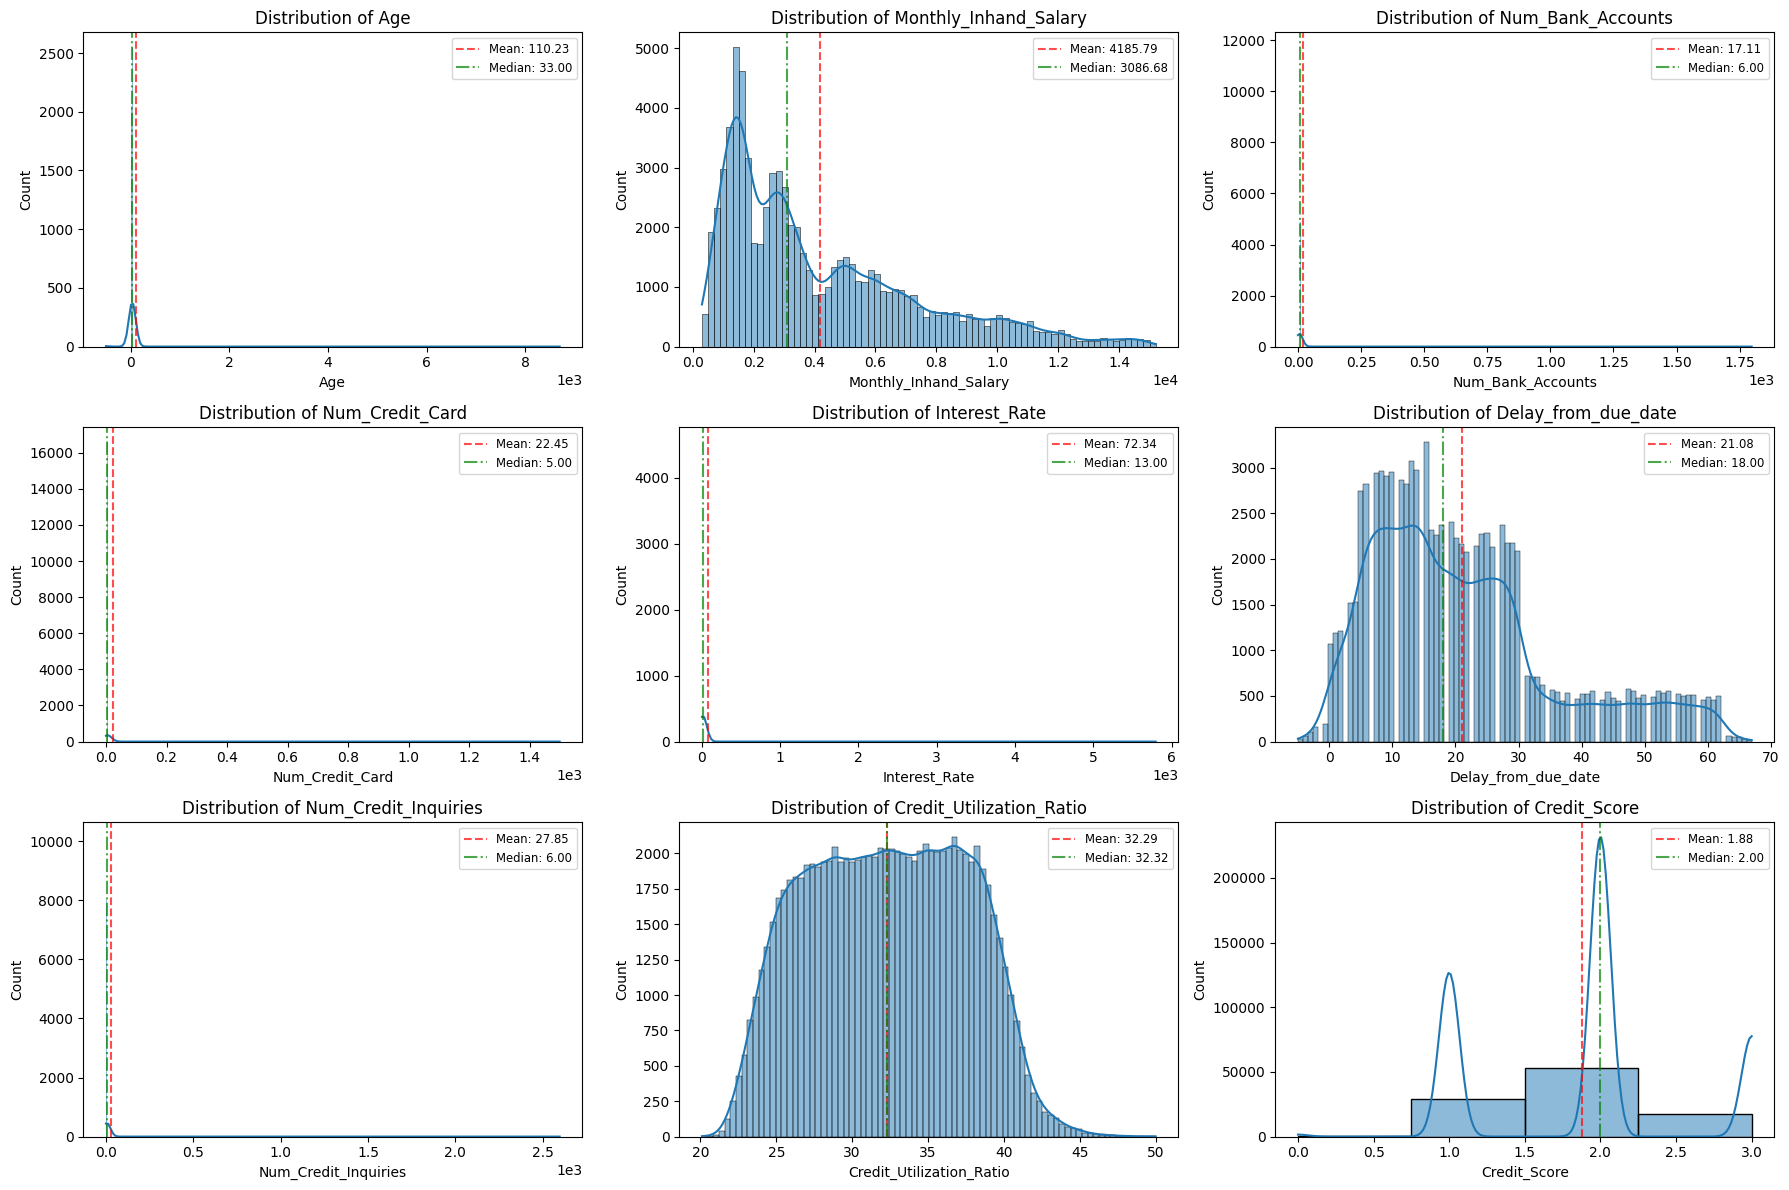

In [ ]:
numeric_cols = credit_card_df.select_dtypes(include=['number']).columns

# Create a grid layout for better visualization
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate required number of rows

# Create subplots with a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through all numerical columns and plot their distributions
for i, col in enumerate(numeric_cols):
    # Determine appropriate number of bins based on data characteristics
    if credit_card_df[col].nunique() < 10:
        bins = credit_card_df[col].nunique()  # Discrete data with few values
    else:
        bins = 'auto'  # Let Seaborn determine optimal bins
    
    # Create histogram with kernel density estimate
    sns.histplot(data=credit_card_df, x=col, kde=True, bins=bins, ax=axes[i])
    
    # Add mean and median lines for reference
    mean_val = credit_card_df[col].mean()
    median_val = credit_card_df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-.', alpha=0.7, label=f'Median: {median_val:.2f}')
    
    # Add legend and title
    axes[i].legend(fontsize='small')
    axes[i].set_title(f'Distribution of {col}')
    
    # Handle axis labels for better readability
    if credit_card_df[col].max() > 1000:
        axes[i].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()